Karine Mellata
260741673

# Assignment 1 - ECSE415

#### All images are expected to be found in a folder named "images" in the same directory as this file.

### Imports required for *all questions*

In [256]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 1. Thresholding

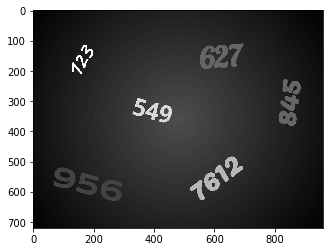

In [257]:
numbers_arr = cv2.imread("./images/numbers.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(numbers_arr, cmap='gray')

In [258]:
# T2 is only required for window
def threshold(a, t1, t2=None, t_type="simple"):
    if t_type == "simple":
        return 255 if a > t1 else 0
        
    elif t_type == "inverse":
        return 255 if a < t1 else 0
    
    else:
        if t2:
            return 255 if (a > t1 and a < t2) else 0
        else:
            raise Exception("T2 must be defined")

def display_thres_image(image_arr, t1, t2=None, t_type="simple"):
    vthreshold = np.vectorize(threshold)
    threshold_arr = vthreshold(image_arr, t1, t2, t_type)
    plt.imshow(threshold_arr, cmap='gray')

## Question 1

**Simple binary thresholding at 55, 90 and 150 thresholds**

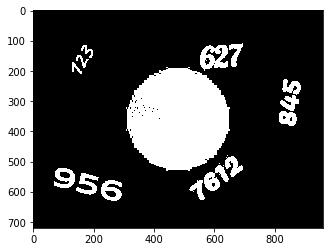

In [259]:
display_thres_image(numbers_arr, 55, t_type="simple")

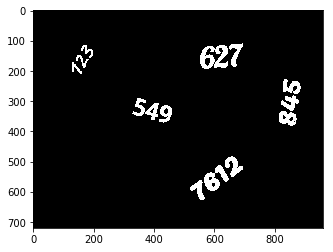

In [260]:
display_thres_image(numbers_arr, 90, t_type="simple")

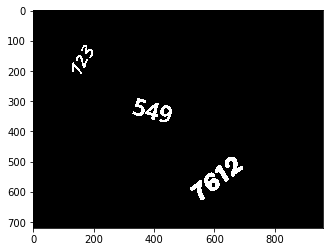

In [261]:
display_thres_image(numbers_arr, 150, t_type="simple")

**Inverse binary thresholding at 55, 90 and 150 thresholds**

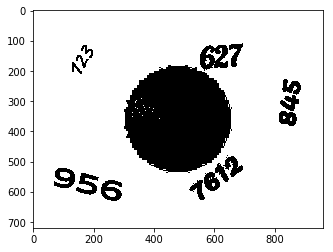

In [262]:
display_thres_image(numbers_arr, 55, t_type="inverse")

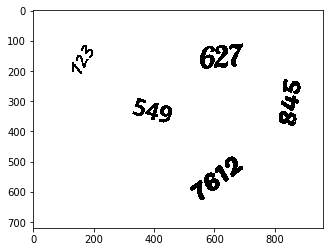

In [263]:
display_thres_image(numbers_arr, 90, t_type="inverse")

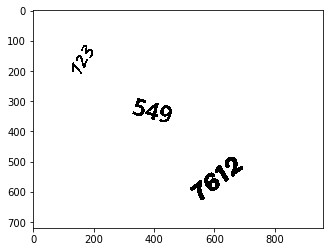

In [264]:
display_thres_image(numbers_arr, 150, t_type="inverse")

## Question 2

**SBT**: Simple Binary Thresholding

**IBT**: Inverse Binary Thresholding

Both simple and inverse binary thresholding have the same exact result except inversed - a black pixel in SBT will be white in IBT and vice-versa. 

The first threshold of 55 seems too low for both methods - as the middle of the original picture is a little paler, it gets fully segmented even though it is not a number. With this threshold, 5 numbers get segmented and the 6th number "549" would have theoritically been segmented had it not been drowned out by the entire middle portion being segmented as well.

The second threshold of 90 creates 5 segmented numbers, this time without the middle unwanted portion being segmented. The 956 number gets lost.

The third threshold of 150 has 3 segmented numbers, with numbers 956, 627 and 845 lost. This is to be expected as they are much "paler" on the original picture or in other words, much closer to the colour of the background.

## Question 3

**Window binary thresholding at [55, 90], [90,150] and [55,150] thresholds**

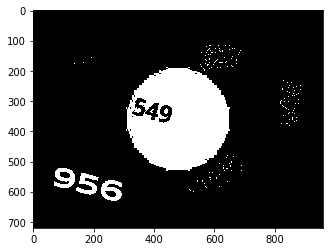

In [265]:
display_thres_image(numbers_arr, 55, 90, t_type="window")

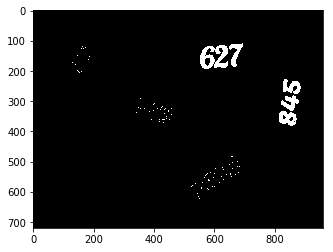

In [266]:
display_thres_image(numbers_arr, 90, 150, t_type="window")

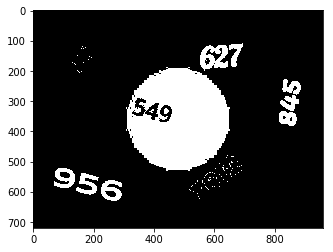

In [267]:
display_thres_image(numbers_arr, 55, 150, t_type="window")

For the first threshold window of [55, 90], there is technically only 1 number, 956, that is segmented. Number 546 is visible, but only because the unwanted middle portion has been wrongfully segmented. The higher threshold, 90, is too low to segment numbers 123, 549, 7612, 627 and 845. However, it seems like 956 falls between 55 and 90, so it gets segmented. It also seems like the middle part gets segmented as well, therefore this part also falls between 55 and 90.

For the second threshold window of [90, 150], two numbers have been segmented, 627 and 845. It seems like the higher threshold, 150, is too low to include "whiter" numbers such as 123, 549, 7612. However, has we can slightly see the outline, we can see that 150 is not too far from an optimal higher threshold. The lower threshold, 90, is too high to include "blacker" number 956. Also, this threshold does not segment the unwanted middle portion.

The last threshold window of [55, 150] segments 3 numbers, 627, 845 and 956. The unwanted middle part is once again wrongfully segmented, which means once again that the lower threshold of 55 is too low. 

## Question 4

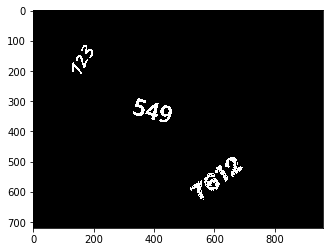

In [268]:
display_thres_image(numbers_arr, 180, t_type="simple")
# We can see 7612 disappearing!

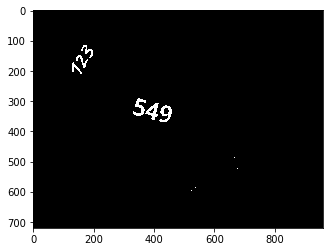

In [269]:
display_thres_image(numbers_arr, 200, t_type="simple")

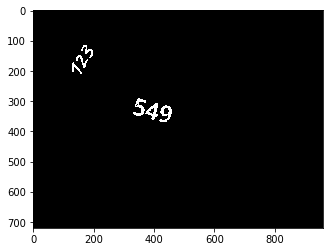

In [270]:
display_thres_image(numbers_arr, 205, t_type="simple")

As seen in the original picture, 123, 549 and 7612 are the "whitest" colours. However, 7612 is a little darker, therefore it was only needed to increase the threshold (closer to 255, a white pixel) just enough so it removes 7612 but not 549. At threshold 200, we are almost there, but we still see 4 pixels of 7612. The threshold was then increased to 205 to fully removed 7612.

# 2. Denoising

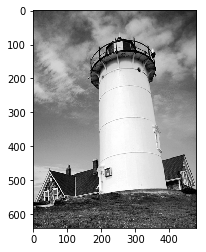

In [271]:
lighthouse = cv2.imread("./images/lighthouse.png", cv2.IMREAD_GRAYSCALE)
gaussian_lighthouse = cv2.imread("./images/gaussian_lighthouse.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(lighthouse, cmap='gray')

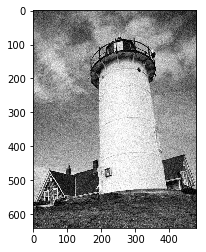

In [272]:
plt.imshow(gaussian_lighthouse, cmap='gray')

## Question 1

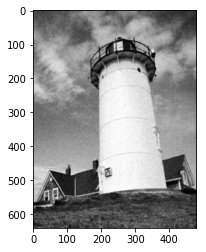

In [273]:
gauss_filter_img = cv2.GaussianBlur(gaussian_lighthouse, (5,5), 2)
plt.imshow(gauss_filter_img, cmap='gray')

## Question 2

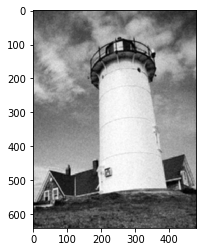

In [274]:
box_filter_img = cv2.blur(gaussian_lighthouse, (5,5))
plt.imshow(box_filter_img, cmap='gray')

## Question 3

In [275]:
# Gauss filter on Gaussian Noise (Best PSNR)
cv2.PSNR(lighthouse, gauss_filter_img)

26.017237509720044

In [276]:
# Box filter on Gaussian Noise PSNR
cv2.PSNR(lighthouse, box_filter_img)

25.30151386920589

In [277]:
# Just as a point of reference 
cv2.PSNR(lighthouse, gaussian_lighthouse)

23.879513566675946

## Question 4

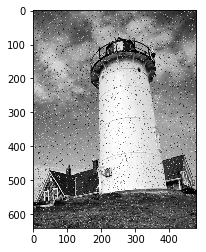

In [278]:
sp_lighthouse = cv2.imread("./images/saltandpepper_lighthouse.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(sp_lighthouse, cmap='gray')

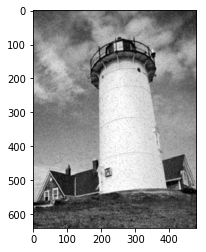

In [279]:
gauss_filter_sp_img = cv2.GaussianBlur(sp_lighthouse, (5,5), 2)
plt.imshow(gauss_filter_sp_img, cmap='gray')

## Question 5

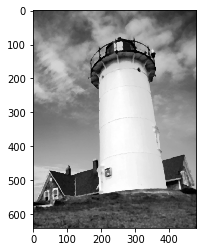

In [280]:
median_filter_img = cv2.medianBlur(sp_lighthouse, 5)
plt.imshow(median_filter_img, cmap='gray')

## Question 6

In [281]:
# Gauss Filter on Salt And Pepper PSNR 
cv2.PSNR(lighthouse, gauss_filter_sp_img)

25.62512261005977

In [282]:
# Median Filter on Salt And Pepper PSNR (Best PSNR)
cv2.PSNR(lighthouse, median_filter_img)

26.808546603069367

In [283]:
# Just as a point of reference 
cv2.PSNR(lighthouse, sp_lighthouse)

21.29385715269628

# 3. Sobel edge detector

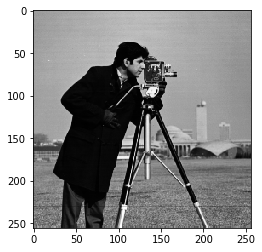

In [284]:
cameraman = cv2.imread("./images/cameraman.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(cameraman, cmap='gray')

In [285]:
# k_size = kernel size
# t_perc = value of threshold as percentage of the maximum pixel value 
def sobel_and_threshold(img, k_size, t_perc):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = k_size)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = k_size)
    abs_grad_x = cv2.convertScaleAbs(sobel_x)
    abs_grad_y = cv2.convertScaleAbs(sobel_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    # Threshold with (arg) percentage * max pixel value
    display_thres_image(grad, t_perc * grad.max(), t_type="simple")

## Question 1

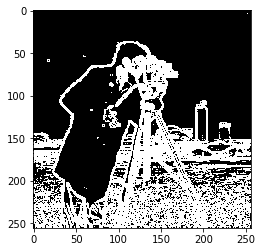

In [286]:
# Kernel of (3x3), threshold of 10%
sobel_and_threshold(cameraman, 3, 0.10)

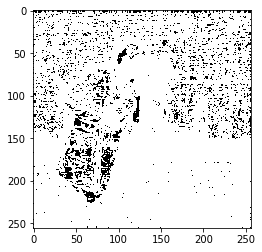

In [287]:
# Kernel of (5x5), threshold of 10%
sobel_and_threshold(cameraman, 5, 0.10)

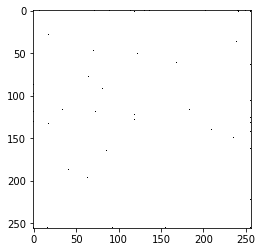

In [288]:
# Kernel of (7x7), threshold of 10%
sobel_and_threshold(cameraman, 7, 0.10)

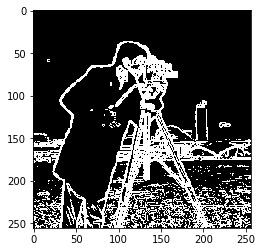

In [289]:
# Kernel of (3x3), threshold of 20%
sobel_and_threshold(cameraman, 3, 0.20)

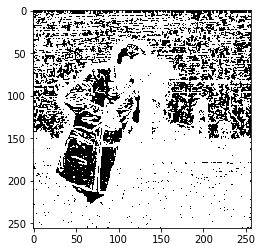

In [290]:
# Kernel of (5x5), threshold of 20%
sobel_and_threshold(cameraman, 5, 0.20)

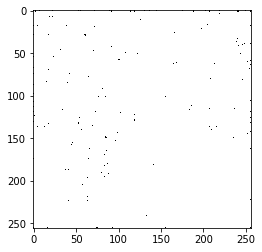

In [291]:
# Kernel of (7x7), threshold of 20%
sobel_and_threshold(cameraman, 7, 0.20)

## Question 2

It seems like a (3x3) kernel works best at clearly detecting edges. However, the (5x5) kernel was able to detect edges in the cameraman's coat which were very hard to notice in the original picture. In addition, a 10% threshold was segmenting slightly too large areas, 20% was much better.

## Question 3

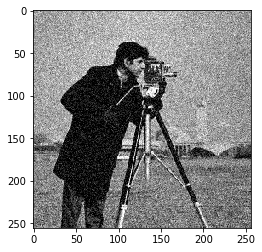

In [292]:
g_cameraman = cv2.imread("./images/gaussian_cameraman.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(g_cameraman, cmap='gray')

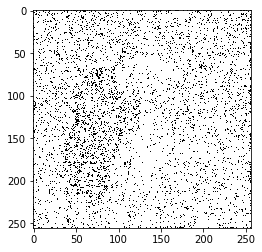

In [293]:
sobel_and_threshold(g_cameraman, 3, 0.10)

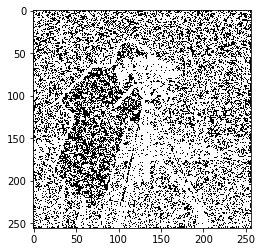

In [294]:
sobel_and_threshold(g_cameraman, 3, 0.20)

## Question 4

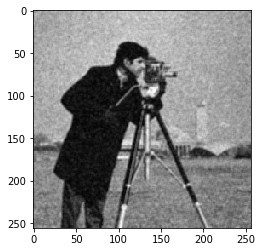

In [295]:
box_filter_cameraman = cv2.blur(g_cameraman, (3,3))
plt.imshow(box_filter_cameraman, cmap='gray')

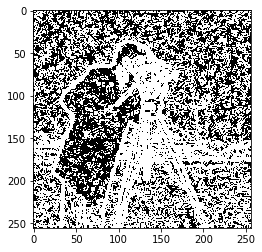

In [296]:
sobel_and_threshold(box_filter_cameraman, 3, 0.10)

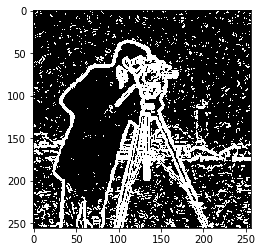

In [297]:
sobel_and_threshold(box_filter_cameraman, 3, 0.20)

## Question 5

As edge detection is susceptible to noise, we can already see with a threshold of 10% that denoising greatly improves the edge detection results. Prior to denoising, absolutely no edges can be seen from the output. After denoising, with the same threshold, one can vaguely see the edges of the cameraman and his camera.

With a threshold of 20%, the results are very messy without denoising, and turn out almost perfect after denoising. The output after denoising with a 20% threshold are comparable to edge detection applied on the original picture (althought there is still some noise in the background, we can clearly see the delimited edges).

# 4. Canny Edge Detection

## Question 1

1. **Noise Reduction**: Filter image with x, y derivatives of Gaussian
2. **Intensity Gradient**: Find magnitude and orientation of gradient
3. **Non-maximum supprission**: Thin multi-pixel wide "ridges" down to single pixel width
4. **Thresholding and linking (hysteresis)** : First define two thresholds (low and high), use the high threshold to start edge curves and the low threshold to continue them

Source: _ECSE-415 Lecture 4 - Edge Detection_ and https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

## Question 2

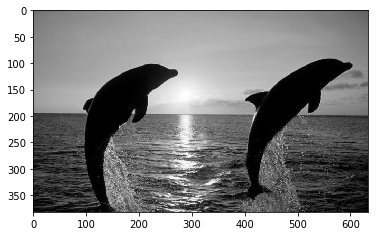

In [298]:
dolphin = cv2.imread("./images/dolphin.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(dolphin, cmap='gray')

In [299]:
def canny_edge(img, k, l, h, num):
    filtered_img = cv2.GaussianBlur(img, (k,k), 2)
    canny_img = cv2.Canny(filtered_img, l, h)
    plt.figure()
    plt.title(str(num) + '. (K:' + str(k) + ', L:' + str(l)+ ', H:' + str(h) + ')')
    plt.imshow(canny_img, cmap = 'gray')

/Users/karinemellata/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


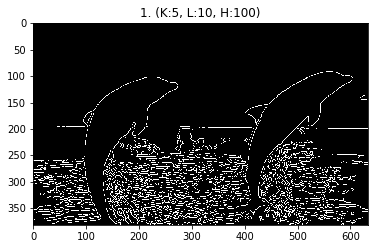

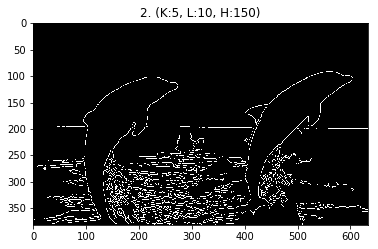

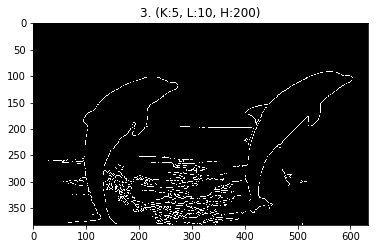

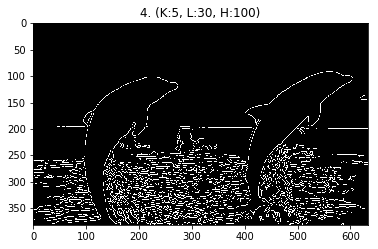

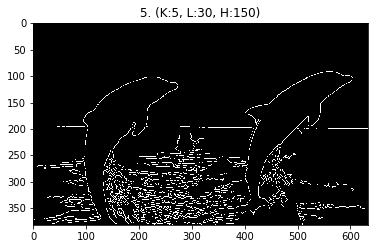

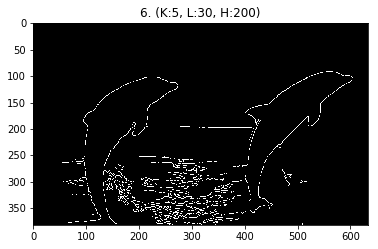

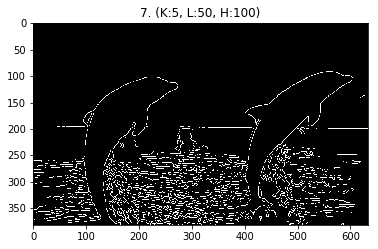

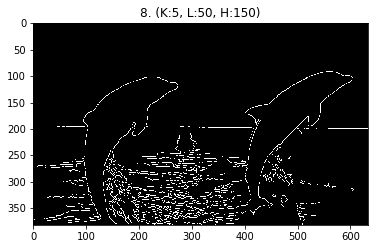

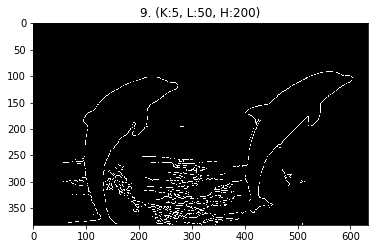

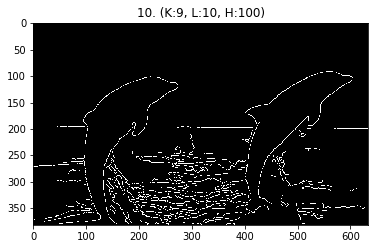

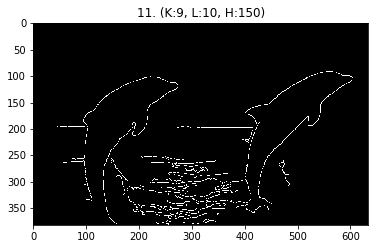

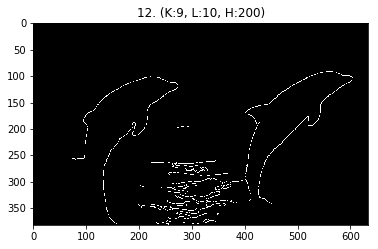

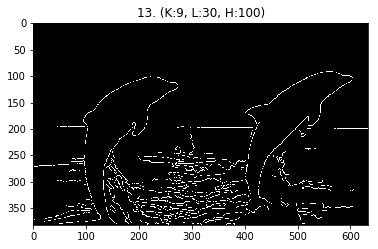

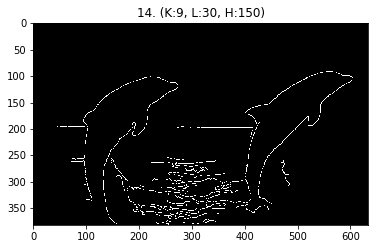

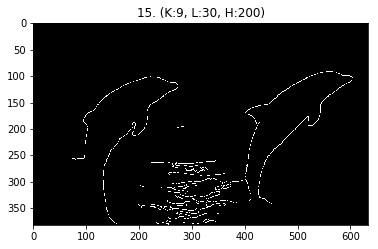

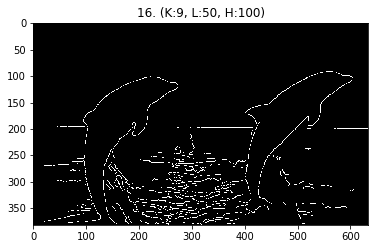

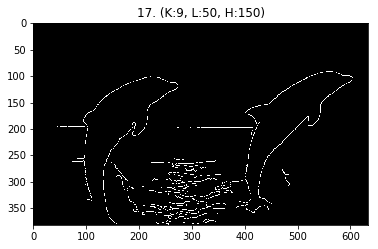

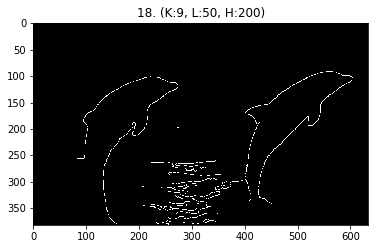

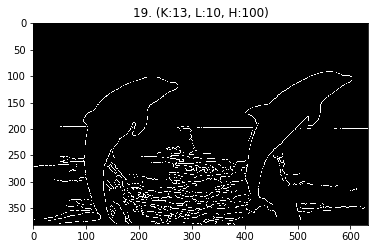

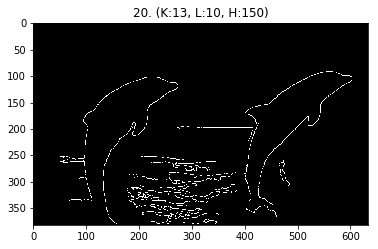

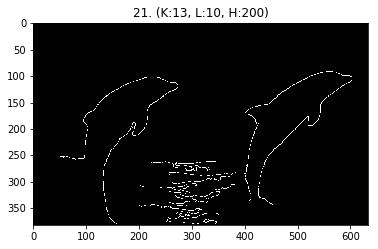

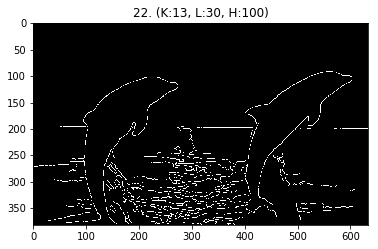

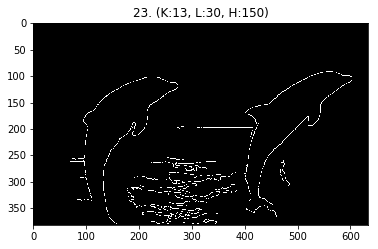

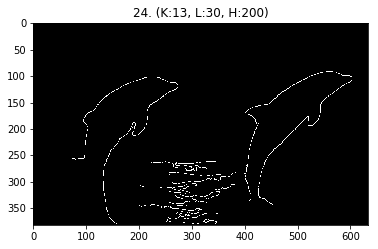

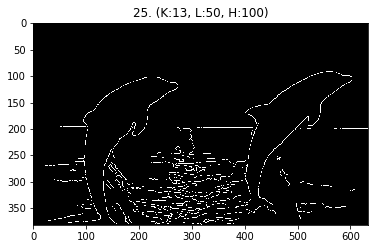

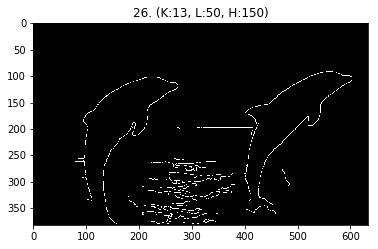

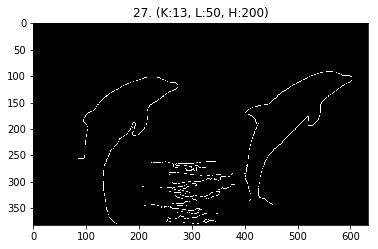

In [300]:
k_arr = [5,9,13]
l_arr = [10,30,50]
h_arr = [100,150,200]
combined = [(k,l,h) for k in k_arr for l in l_arr for h in h_arr]

i = 1
for c in combined:
    canny_edge(dolphin, c[0], c[1], c[2], i)
    i+=1

## Question 3

The most sensitive hyperparameters combination to edges are 1, 4 and 7. Now they all have the lowest "H" parameter of 100, which hints that a lower high threshold will yield more sensitivity to edges. Numbers 10, 13, 16, 19, 22 and 25 all have "H" of 100, and are still more sensitive than the other images with higher "H" but not as much as 1, 4, 7. That is because 1, 4 and 7 also have a kernel size of (5, 5) for the Gaussian Blur which seems to be efficient at eliminating some noise, but not efficient enough to remove the "edges" in the water (given that edge detection is very susceptible to noise). We can see that higher Ks are much better at blurring out the waves ("edges" in the water), which leaves only dolphin edges.

Lastly, we can compare the "L" hyperparameters by comparing numbers 1, 4 and 7 as they all have the same K and H hyperparameters. We can see that 1. has the lowest "L" and the highest sensitivity. Therefore, once again, a lower L hints at higher sensitivity. 

## Question 4

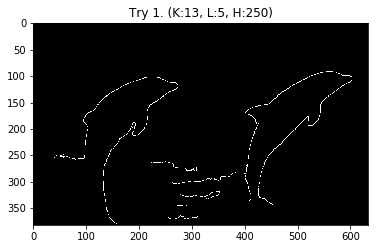

In [301]:
# Higher K and larger difference L and H
canny_edge(dolphin, 13, 5, 250, 'Try 1')

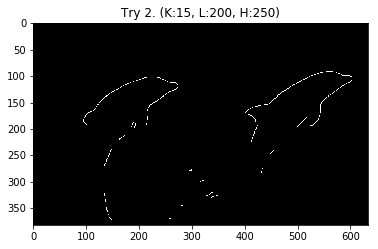

In [302]:
# Higher K and larger L and H
canny_edge(dolphin, 15, 200, 250, 'Try 2')

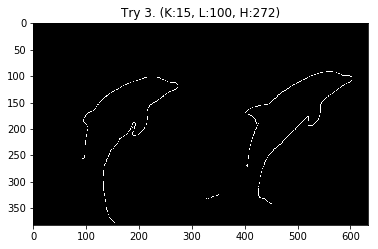

In [303]:
# Higher K and smaller L and same H
# This is the closest solution
canny_edge(dolphin, 15, 100, 272, 'Try 3')

**K**: 15

**L**: 100

**H**: 272

# 5. Harris Corner Detection

In [323]:
def harris_corner(img, threshold, thickness_circle, radius_circle):
    # Image with coloured point
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    width, height = img.shape
    
    # 1. Blur
    g_img = cv2.blur(img, (3,3))
    
    # 2. Get image derivatives
    sobel_x = cv2.Sobel(g_img, cv2.CV_64F, 1, 0, ksize = 3)
    sobel_y = cv2.Sobel(g_img, cv2.CV_64F, 0, 1, ksize = 3)
    
    # 3. Get square of derivatives
    sobel_x_2 = np.square(sobel_x)
    sobel_y_2 = np.square(sobel_y)
    sobel_xy = np.multiply(sobel_x, sobel_y)
    sobel_yx = np.multiply(sobel_y, sobel_x)
    
    # 4. Gaussian blur
    g_sobel_x_2 = cv2.GaussianBlur(sobel_x_2, (3,3), 2)
    g_sobel_y_2 = cv2.GaussianBlur(sobel_y_2, (3,3), 2)
    g_sobel_xy = cv2.GaussianBlur(sobel_xy, (3,3), 2)
    g_sobel_yx = cv2.GaussianBlur(sobel_yx, (3,3), 2)
    
    # 5. Cornerness fct response
    cornerness_fct_result = np.zeros((width, height), np.float32)
    k = 0.05
    for y in range(width):
        for x in range(height):
            H = np.array([[g_sobel_x_2[y][x], g_sobel_xy[y][x]], [g_sobel_yx[y][x], g_sobel_y_2[y][x]]])
            cornerness_fct_result[y][x] = np.linalg.det(H) - (k * np.square(np.trace(H)))
    
    # 6. NMS
    for y in range(width):
        for x in range(height):
            if cornerness_fct_result[y][x] > threshold:
                max_pixel = cornerness_fct_result[y][x]
                corner = True
                for i in range(5):
                    for j in range(5):
                        if y + i - 2 < width and x + j - 2 < height:
                            if cornerness_fct_result[y + i - 2][x + j - 2] > max_pixel:
                                corner = False
                                break
                # Circle corners
                if corner:
                    cv2.circle(img_color, (x, y), radius_circle, (255, 0, 0), thickness_circle)
    
    print(cornerness_fct_result.max())
    # 7. Display image
    plt.imshow(img_color)

## Question 1

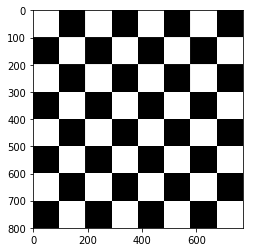

In [305]:
cb_arr = cv2.imread("./images/checkerboard.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(cb_arr, cmap='gray')

9793783000.0


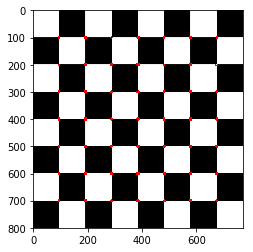

In [306]:
# Random high number
# Also looking at the output of "print(cornerness_fct_result.max())" in the fct to find the max
harris_corner(cb_arr, 20000, 2, 3)

9793783000.0


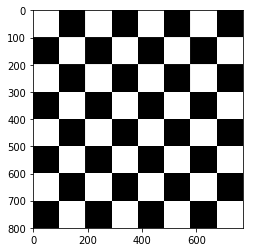

In [307]:
# cornerness fct's output's max is 9793783000. 
# As expected, no corners
harris_corner(cb_arr, 9793783000, 2, 3)

9793783000.0


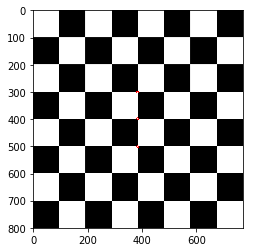

In [308]:
# Only 3 corners
harris_corner(cb_arr, 9793783000*0.99, 2, 3)

9793783000.0


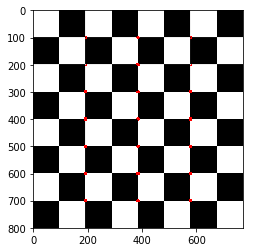

In [309]:
# Some corners, not all
harris_corner(cb_arr, 9793783000*0.90, 2, 3)

9793783000.0


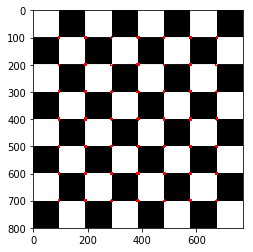

In [310]:
# All corners are there
harris_corner(cb_arr, 9793783000*0.80, 2, 3)

### Observations

We can see that at a threshold of 20000, which is way too low, all corners are there. However, the image is really simple, so a complex threshold is not too necessary. To explore how to threshold corners, I have used the maximum of the cornerness function's output, and have used a percentage of this as a threshold. At 99%, only 3 corners are shown. At 80%, we can see all corners. In between, there is only a portion of corners shown.

## Question 2

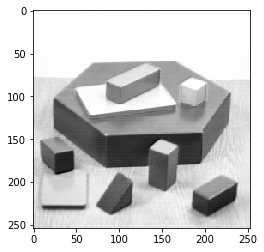

In [311]:
shapes_arr = cv2.imread("./images/shapes.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(shapes_arr, cmap='gray')

836900300.0


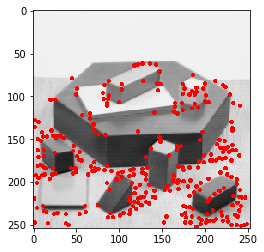

In [312]:
# Random high number
# Also looking at the output of "print(cornerness_fct_result.max())" in the fct to find the max
harris_corner(shapes_arr, 20000, 2, 1)

836900300.0


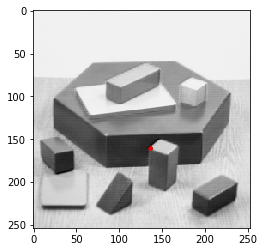

In [313]:
# One corner
harris_corner(shapes_arr, 836900300*0.99, 2, 1)

836900300.0


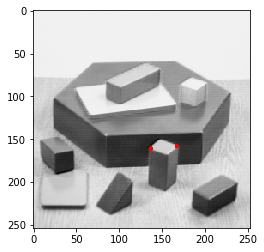

In [314]:
# 2 corners
harris_corner(shapes_arr, 836900300*0.85, 2, 1)

836900300.0


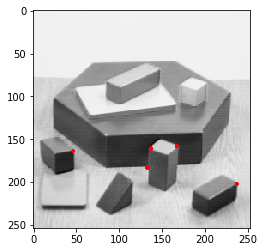

In [315]:
# Some corners
harris_corner(shapes_arr, 836900300*0.50, 2, 1)

836900300.0


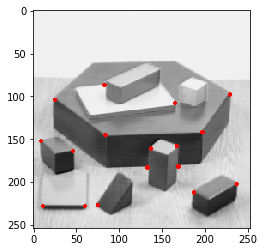

In [316]:
# Almost all corners
harris_corner(shapes_arr, 836900300*0.15, 2, 1)

836900300.0


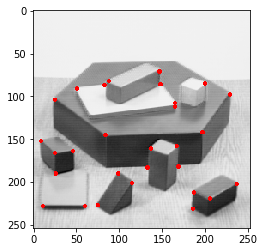

In [317]:
# Almost all relevant corners
harris_corner(shapes_arr, 836900300*0.05, 2, 1)

### Observations
We see that with a more complex image, thresholding is much more complicated, as corners are just harder to notice. With too high of a threshold (closer to the max value), too many corners are lost. It is at around 5% of the max value that we really get all relevant corners, still with some missing. The starting value of 20000 is too low, a lot of corners displayed are noise. We can also notice, in general, that corners that are the center of 3 distinct colour shades rather that just two, are easier to pick up for the algorithm.

## Question 3

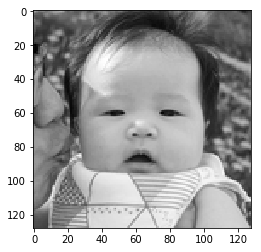

In [318]:
face = cv2.imread("./images/55000.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(face, cmap='gray')

1125130900.0


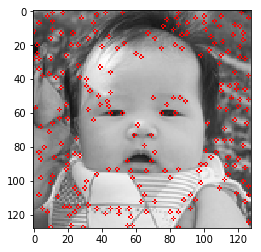

In [319]:
# Too much noise
harris_corner(face, 60000, 1, 1)

1125130900.0


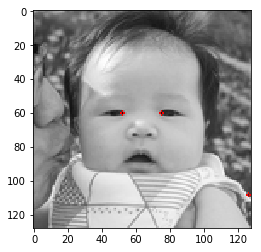

In [320]:
# Only the eyes (most obvious corners) and one random corner
# Not sensitive enough
harris_corner(face, 1125130900*0.50, 1, 1)

1125130900.0


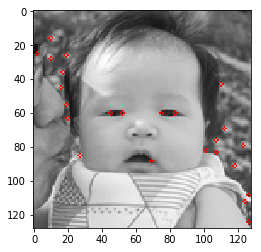

In [321]:
# All corners of the face are becoming clear
harris_corner(face, 1125130900*0.10, 1, 1)

1125130900.0


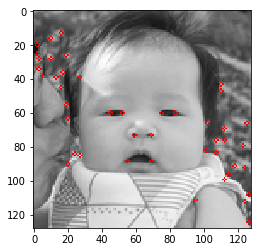

In [322]:
# All corners of the face!
harris_corner(face, 1125130900*0.05, 1, 1)

### Observations
We can see that for this image too, 5% of the max value was an adequate threshold, as all corners of the face were clearly picked up by the algorithm. However, as expected, there is a lot of noise in the background, but it is normal that the algorithm picks it up as a corner. A threshold of 60000 is too low as noise is picked up on the face as well (baby hair, section under the eyebrow).